In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize']=(12,8)
%matplotlib inline


In [2]:
df=pd.read_csv(r'C:\Users\admin\Downloads\archive\movies.csv' ) 
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
#checking the missing data 
for col in df.columns:
    miss_percent=np.mean(df[col].isnull())
    print('{}  {}%'.format(col,miss_percent))

name  0.0%
rating  0.010041731872717789%
genre  0.0%
year  0.0%
released  0.0002608242044861763%
score  0.0003912363067292645%
votes  0.0003912363067292645%
director  0.0%
writer  0.0003912363067292645%
star  0.00013041210224308815%
country  0.0003912363067292645%
budget  0.2831246739697444%
gross  0.02464788732394366%
company  0.002217005738132499%
runtime  0.0005216484089723526%


In [6]:
df['rating'].unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

In [7]:
df[df['writer'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
1820,The Garden,Unrated,Drama,1990,1990 (United States),6.4,840.0,Derek Jarman,NaN,Tilda Swinton,United Kingdom,NaN,5006.0,Basilisk Communications,92.0
5834,The Trip,Not Rated,Comedy,2010,"April 24, 2011 (Greece)",7.0,22000.0,Michael Winterbottom,NaN,Steve Coogan,United Kingdom,NaN,3945217.0,Baby Cow Productions,112.0
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,NaN,240663149.0,Beijing Enlight Pictures,110.0


In [8]:
#filling the missing data with proper value
df['released'].fillna(method='pad',inplace=True)

df.fillna({'rating':'Not Rated','score':df['score'].mean(),'votes':df['votes'].mean(),'writer':'not mentioned','star':'no star','country':'not mentioned',
           'budget':df['budget'].mean(),'gross':df['gross'].mean(),'company':'not mentioned','runtime':df['runtime'].mean()},inplace=True)

In [9]:
df.isnull().sum().sum()
# now we have no null data

0

In [10]:
#changing the data type from float to  int
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [11]:
dff=df['correct year']=df['released'].astype(str).str.split(', ').str[-1]
dff

0       1980 (United States)
1       1980 (United States)
2       1980 (United States)
3       1980 (United States)
4       1980 (United States)
                ...         
7663    2020 (United States)
7664    2020 (United States)
7665         2020 (Cameroon)
7666    2020 (United States)
7667    2020 (United States)
Name: released, Length: 7668, dtype: object

# Sorting the data based on max gross

In [12]:
df.sort_values(by='gross',inplace=False,ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009 (United States)
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019 (United States)
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997 (United States)
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015 (United States)
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018 (United States)


In [13]:
# to have a customized number of the rows, if None it will show all the dataset
pd.set_option('display.max_rows',10)

Text(33.0, 0.5, 'Movie Feautures')

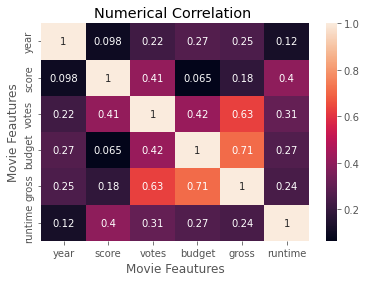

In [14]:
df_matrices=df.corr()
sns.heatmap(df_matrices,annot=True)
plt.title("Numerical Correlation ")
plt.xlabel("Movie Feautures")
plt.ylabel("Movie Feautures")

# the relatoin between budget and gross 

<AxesSubplot:xlabel='gross', ylabel='budget'>

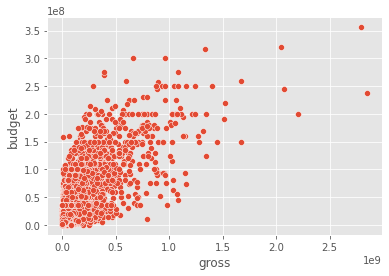

In [15]:
sns.scatterplot(x=df['gross'],y=df['budget'])

<AxesSubplot:xlabel='gross', ylabel='budget'>

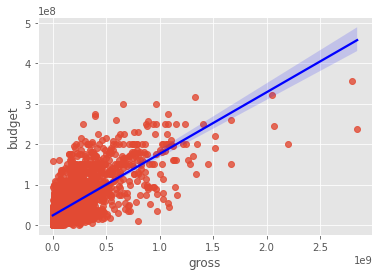

In [16]:
sns.regplot(x=df['gross'],y=df['budget'],line_kws={"color":"blue"})

# Categorizing the non numerical values to compare them

<AxesSubplot:>

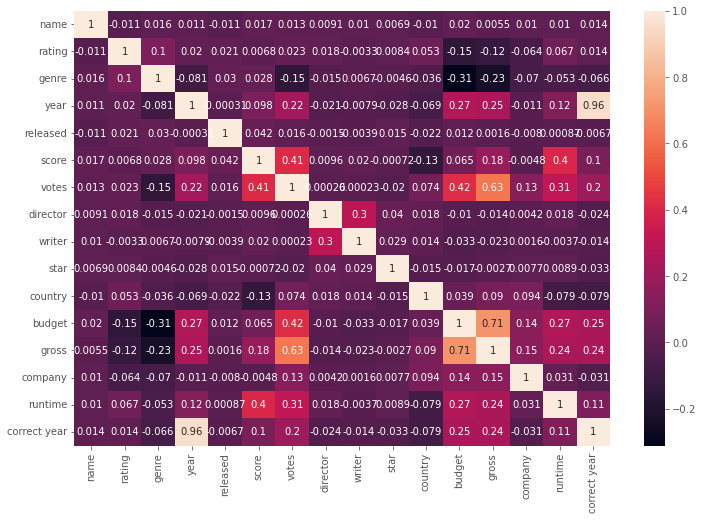

In [25]:

df_numerized=df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtypes=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
fig,ax=plt.subplots(figsize=(12,8)) 
sns.heatmap(df_numerized.corr(),annot=True)
